In [ ]:
#  Importing libraries for exploratory Data Analysis & Data Visualization
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np


# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

# New section

In [ ]:
#  importing Data 
file_path = '/content/starcraft_player_data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
#checking data set shape
df.shape

(3338, 19)

In [ ]:
# First 5 rows of data
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [ ]:
# drop NA values
df = df.dropna()

In [ ]:
# change the objects like Age, Hoursperweek, TotalHours into integers
df[['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3340 non-null   Int64  
 3   HoursPerWeek          3339 non-null   Int64  
 4   TotalHours            3338 non-null   Int64  
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [ ]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
# Tackling the Age attribute
pd.unique(df['Age'])

<IntegerArray>
[27, 23, 30, 19, 32, 21, 17, 20, 18, 16, 26, 38, 28, 25, 22, 29, 24, 35, 31,
 33, 37, 40, 34, 43, 41, 36, 44, 39]
Length: 28, dtype: Int64

In [ ]:
# Looking at that 1 million TotalHours row and delete that row
df = df[df['TotalHours'] != 1000000]
print('Remaining records in df = ' + str(len(df)))

Remaining records in df = 3337


In [ ]:
# check the dataframe showing empty
filtered_df = df[df['TotalHours'] == 1000000]

In [ ]:
print(filtered_df)

Empty DataFrame
Columns: [LeagueIndex, Age, HoursPerWeek, TotalHours, APM, SelectByHotkeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, MinimapRightClicks, NumberOfPACs, GapBetweenPACs, ActionLatency, ActionsInPAC, TotalMapExplored, WorkersMade, UniqueUnitsMade, ComplexUnitsMade, ComplexAbilitiesUsed]
Index: []


In [ ]:
# converted to years
df_temp = df[['Age', 'TotalHours']].copy(deep=True)
df_temp['TotalHours'] = pd.to_numeric(df_temp['TotalHours'], errors='coerce')
df_temp['Age'] = pd.to_numeric(df_temp['Age'], errors='coerce')
df_temp['TotalHoursInYears'] = df_temp['TotalHours'] / 24 / 365
df_temp['AgeMinusTotalHoursInYears'] = df_temp['Age'] - df_temp['TotalHoursInYears']
df_temp.head()

,Age,TotalHours,TotalHoursInYears,AgeMinusTotalHoursInYears
0,27,3000,0.342466,26.657534
1,23,5000,0.570776,22.429224
2,30,200,0.022831,29.977169
3,19,400,0.045662,18.954338
4,32,500,0.057078,31.942922


In [ ]:
# Drop the GameID because no use of that row
df.drop("GameID", axis = 1, inplace = True)

In [ ]:
df.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


<Axes: >

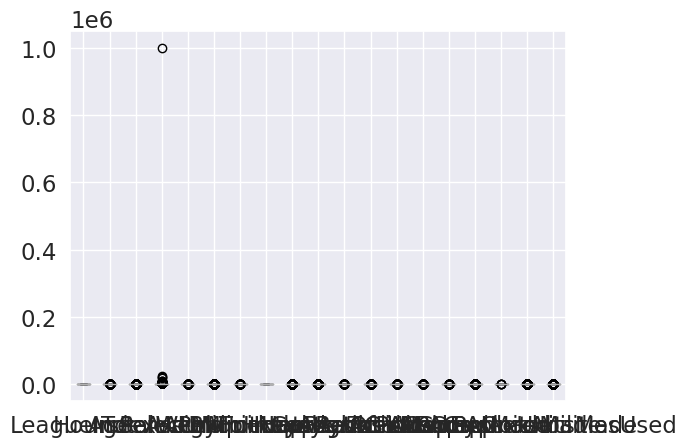

In [ ]:
# Box plot to analyse outiers
df.boxplot()

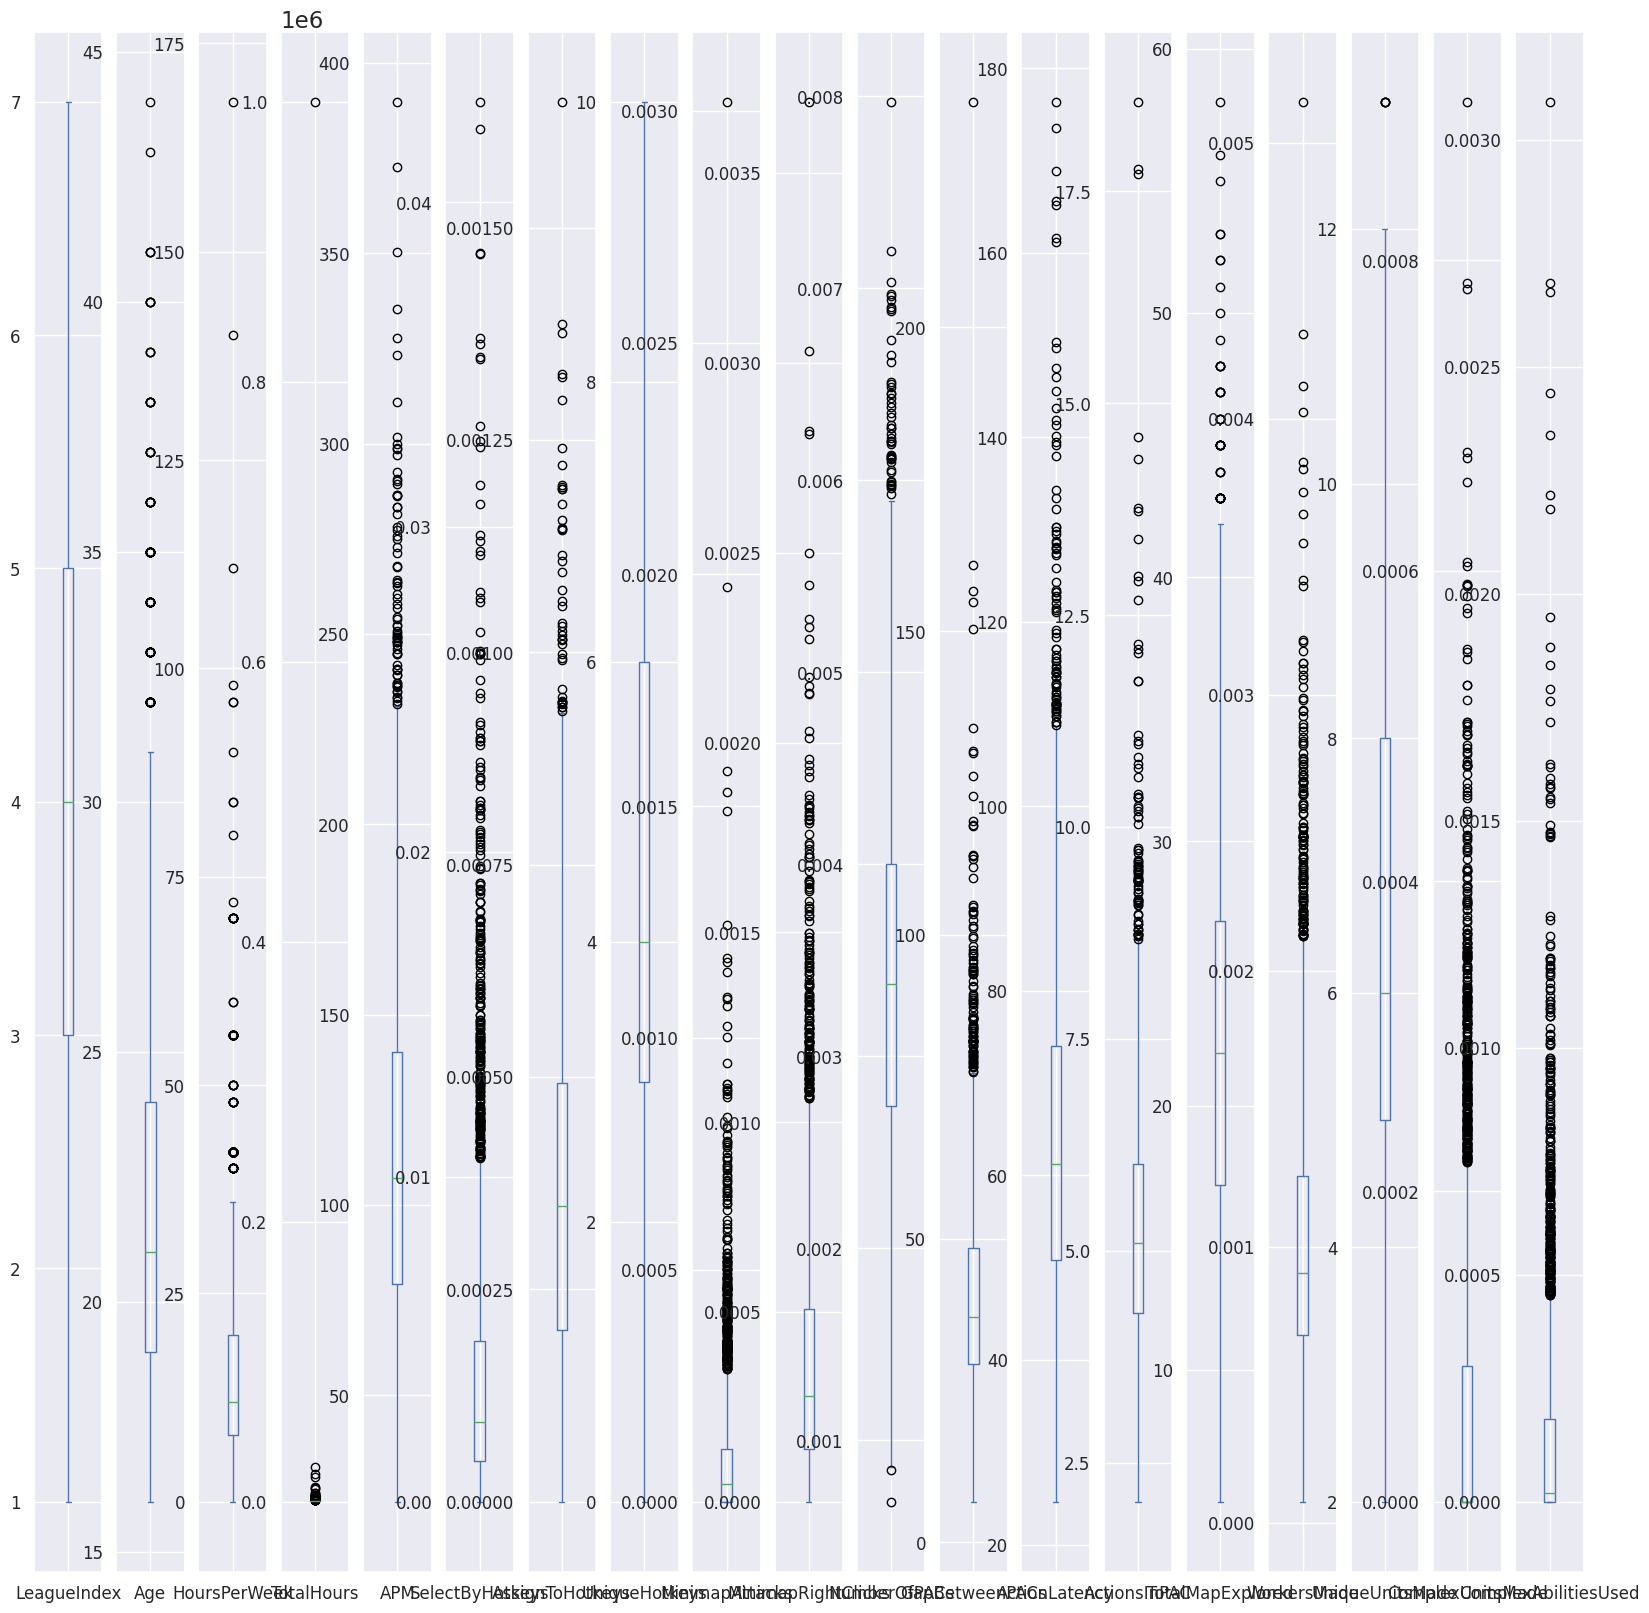

In [ ]:
df.plot(kind='box', subplots=True,fontsize=12, figsize=(20,20))
plt.show()

<Axes: >

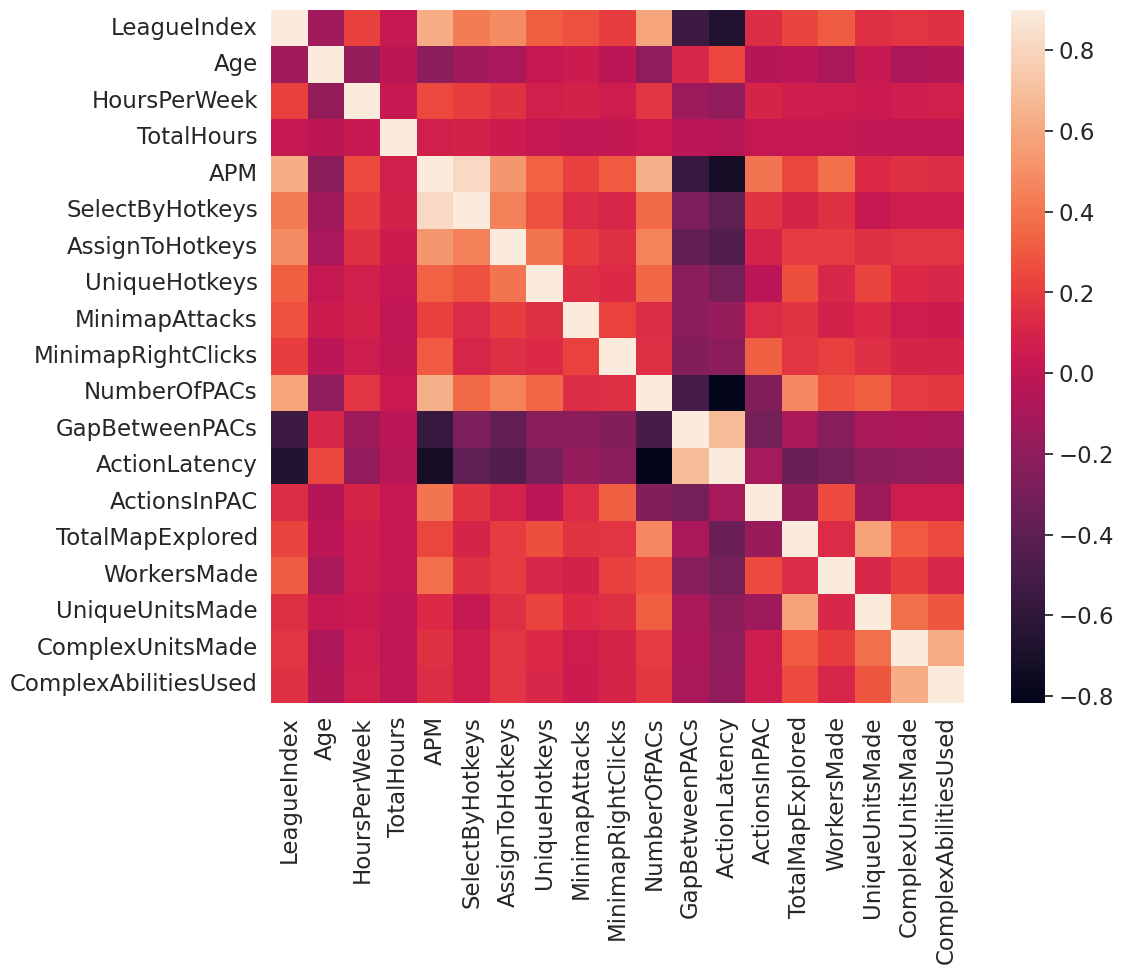

In [ ]:
#Correlation map to see how features are correlated with LeagueIndex
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:

lst_best_features = ['TotalHours', 'APM','SelectByHotkeys', 'AssignToHotkeys', 'NumberOfPACs',
                     'GapBetweenPACs', 'ActionLatency']

In [ ]:
# SelectKBest Work
x_features = df.copy(deep=True)
x_features = x_features[lst_best_features]
y_target = df['LeagueIndex']
x_features.head()

,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,3000,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5000,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,200,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,400,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,500,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


In [ ]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model = knn_model.fit(x_features, y_target)
knn_model.score(x_features, y_target)
print('KNN Score:', knn_model.score(x_features, y_target))
predicted = knn_model.predict(x_features)
print(sorted(pd.unique(predicted)))

KNN Score: 0.46674655482324745
[1, 2, 3, 4, 5, 6]


In [ ]:
# RandomForest model

In [ ]:
df.replace('?', np.nan, inplace=True)

# Split the dataset into features and target variable
X = df.loc[:,['TotalHours','APM','SelectByHotkeys','AssignToHotkeys','NumberOfPACs','GapBetweenPACs','ActionLatency']]  # Features
y = df['LeagueIndex']  # Target variable

# Convert object columns to numeric
X = X.apply(pd.to_numeric)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=355)

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.14      0.21        65
           2       0.27      0.27      0.27        94
           3       0.27      0.28      0.28       151
           4       0.34      0.43      0.38       229
           5       0.44      0.37      0.40       276
           6       0.46      0.55      0.50       175
           7       0.00      0.00      0.00        12

    accuracy                           0.37      1002
   macro avg       0.32      0.29      0.29      1002
weighted avg       0.38      0.37      0.37      1002



In [ ]:
# training accuracy
rf_classifier.score(X_train, y_train)

1.0

In [ ]:
# testing accuracy
rf_classifier.score(X_test, y_test)

0.3722554890219561